In [2]:
# ================================
# Standard library
# ================================
import os
import random

# ================================
# Data manipulation
# ================================
import numpy as np
import pandas as pd

# ================================
# Visualization
# ================================
import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# Signal processing
# ================================
from scipy.signal import savgol_filter

# ================================
# Preprocessing
# ================================
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# ================================
# Model selection / CV
# ================================
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    KFold,
    StratifiedKFold
)

# ================================
# ML models — Regression
# ================================
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression

# ================================
# ML models — Classification
# ================================
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# ================================
# Metrics
# ================================
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

# ================================
# PyTorch (for NN models)
# ================================
import torch
import torch.nn as nn



In [5]:
OUT_DIR="instances_images"
CSV_PATH=os.path.join(OUT_DIR, "graphs_images_flat_16.csv")
df=pd.read_csv(CSV_PATH)
df.head(7)

,instance_name,graph_type,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,...,pixel_246,pixel_247,pixel_248,pixel_249,pixel_250,pixel_251,pixel_252,pixel_253,pixel_254,pixel_255
0,barabasi_n1000_m10_1,barabasi,0.176471,0.043137,0.062745,0.082353,0.062745,0.058824,0.054902,0.047059,...,0.011765,0.011765,0.007843,0.011765,0.011765,0.007843,0.007843,0.011765,0.007843,0.007843
1,barabasi_n1000_m10_10,barabasi,0.117647,0.054902,0.058824,0.062745,0.050980,0.043137,0.047059,0.039216,...,0.015686,0.011765,0.011765,0.011765,0.007843,0.007843,0.007843,0.011765,0.011765,0.007843
2,barabasi_n1000_m10_11,barabasi,0.184314,0.047059,0.058824,0.062745,0.070588,0.050980,0.058824,0.054902,...,0.011765,0.015686,0.011765,0.011765,0.015686,0.011765,0.007843,0.007843,0.007843,0.007843
3,barabasi_n1000_m10_12,barabasi,0.168627,0.066667,0.062745,0.074510,0.050980,0.062745,0.050980,0.054902,...,0.015686,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.007843,0.007843
4,barabasi_n1000_m10_13,barabasi,0.200000,0.050980,0.074510,0.082353,0.050980,0.058824,0.054902,0.058824,...,0.015686,0.011765,0.011765,0.011765,0.011765,0.007843,0.007843,0.007843,0.007843,0.011765
5,barabasi_n1000_m10_14,barabasi,0.160784,0.050980,0.070588,0.062745,0.066667,0.058824,0.050980,0.050980,...,0.011765,0.015686,0.011765,0.011765,0.007843,0.011765,0.011765,0.007843,0.007843,0.007843
6,barabasi_n1000_m10_15,barabasi,0.168627,0.047059,0.066667,0.070588,0.058824,0.062745,0.054902,0.050980,...,0.011765,0.011765,0.011765,0.007843,0.007843,0.011765,0.011765,0.007843,0.007843,0.007843


In [7]:
pixel_cols=[c for c in df.columns if c.startswith("pixel_")]
len(pixel_cols)

256

In [9]:

le = LabelEncoder()

X = df[pixel_cols].values        #pixel_cols
y = le.fit_transform(df["graph_type"].values)      #etiquetas: barabasi / erdos / watt

In [11]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

In [15]:
#% de varianza acumulada por los componentes de PCA
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza acumulada:", pca.explained_variance_ratio_.cumsum())

Varianza explicada por cada componente: [0.69702856 0.1717936  0.04817497 0.01165558 0.00806597 0.00442965
 0.00322616 0.00197148 0.00187405 0.00159513]
Varianza acumulada: [0.69702856 0.86882216 0.91699713 0.92865271 0.93671868 0.94114833
 0.94437449 0.94634597 0.94822002 0.94981515]


In [19]:
X_fpca = X_pca[:, :3]

In [109]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_fpca, y,
    test_size=0.2,
    random_state=42, stratify=y
)

In [111]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'class_weight': [None, 'balanced']
}

log_reg = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_lr = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid_lr,
    cv=cv,
    scoring='accuracy',   # podrías usar 'f1_weighted' si te interesa más
    n_jobs=-1,
    verbose=1
)

grid_search_lr.fit(X_train, y_train)

print("Mejores hiperparámetros LogReg:", grid_search_lr.best_params_)

best_lr = grid_search_lr.best_estimator_

def calcular_metricas(modelo, X, y, average='weighted'):
    y_pred = modelo.predict(X)
    return {
        'accuracy': accuracy_score(y, y_pred),
        'precision': precision_score(y, y_pred, average=average, zero_division=0),
        'recall': recall_score(y, y_pred, average=average, zero_division=0),
        'f1': f1_score(y, y_pred, average=average, zero_division=0)
    }

metricas_train_lr = calcular_metricas(best_lr, X_train, y_train)
metricas_test_lr = calcular_metricas(best_lr, X_test, y_test)

resultados_logreg = pd.DataFrame({
    'modelo': ['LogisticRegression'],
    'accuracy_train': [metricas_train_lr['accuracy']],
    'precision_train': [metricas_train_lr['precision']],
    'recall_train': [metricas_train_lr['recall']],
    'f1_train': [metricas_train_lr['f1']],
    'accuracy_test': [metricas_test_lr['accuracy']],
    'precision_test': [metricas_test_lr['precision']],
    'recall_test': [metricas_test_lr['recall']],
    'f1_test': [metricas_test_lr['f1']]
})

print(resultados_logreg)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores hiperparámetros LogReg: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l1'}
               modelo  accuracy_train  precision_train  recall_train  \
0  LogisticRegression        0.847222         0.847345      0.847222   

   f1_train  accuracy_test  precision_test  recall_test   f1_test  
0  0.847196       0.861111        0.861196     0.861111  0.861096  


In [113]:
# Predicciones en entrenamiento y test
y_pred_train = best_lr.predict(X_train)
y_pred_test = best_lr.predict(X_test)

# Etiquetas de clase
class_labels = ['BA','ER','WS']

# ============================
# Matriz de confusión - Train
# ============================
cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                                    display_labels=class_labels)
disp_train.plot(cmap="Blues", values_format="d")
plt.title("Train")
plt.savefig("best_lr_train_confusion.png", dpi=300, bbox_inches="tight")  # Guardar
plt.close()

# ============================
# Matriz de confusión - Test
# ============================
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                                   display_labels=class_labels)
disp_test.plot(cmap="Oranges", values_format="d")
plt.title("Test")
plt.savefig("best_lr_test_confusion.png", dpi=300, bbox_inches="tight")  # Guardar
plt.close()


In [115]:
param_grid_svc = {
    'C': [0.01,0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']  # relevante para rbf y poly
}

svc = SVC(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_svc = GridSearchCV(
    estimator=svc,
    param_grid=param_grid_svc,
    cv=cv,
    scoring='accuracy',   
    n_jobs=-1,
    verbose=1
)

grid_search_svc.fit(X_train, y_train)

print("Mejores hiperparámetros SVC:", grid_search_svc.best_params_)

best_svc = grid_search_svc.best_estimator_

def calcular_metricas(modelo, X, y, average='weighted'):
    y_pred = modelo.predict(X)
    return {
        'accuracy': accuracy_score(y, y_pred),
        'precision': precision_score(y, y_pred, average=average, zero_division=0),
        'recall': recall_score(y, y_pred, average=average, zero_division=0),
        'f1': f1_score(y, y_pred, average=average, zero_division=0)
    }

metricas_train_svc = calcular_metricas(best_svc, X_train, y_train)
metricas_test_svc = calcular_metricas(best_svc, X_test, y_test)

resultados_svc = pd.DataFrame({
    'modelo': ['SVC'],
    'accuracy_train': [metricas_train_svc['accuracy']],
    'precision_train': [metricas_train_svc['precision']],
    'recall_train': [metricas_train_svc['recall']],
    'f1_train': [metricas_train_svc['f1']],
    'accuracy_test': [metricas_test_svc['accuracy']],
    'precision_test': [metricas_test_svc['precision']],
    'recall_test': [metricas_test_svc['recall']],
    'f1_test': [metricas_test_svc['f1']]
})

print(resultados_svc)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Mejores hiperparámetros SVC: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
  modelo  accuracy_train  precision_train  recall_train  f1_train  \
0    SVC        0.943576         0.943668      0.943576  0.943572   

   accuracy_test  precision_test  recall_test   f1_test  
0       0.940972         0.94124     0.940972  0.940958  


In [117]:
# Predicciones en entrenamiento y test
y_pred_train = best_svc.predict(X_train)
y_pred_test = best_svc.predict(X_test)

# Etiquetas de clase
class_labels = ['BA','ER','WS']

# ============================
# Matriz de confusión - Train
# ============================
cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                                    display_labels=class_labels)
disp_train.plot(cmap="Blues", values_format="d")
plt.title("Train")
plt.savefig("best_svc_train_confusion.png", dpi=300, bbox_inches="tight")  # Guardar
plt.close()

# ============================
# Matriz de confusión - Test
# ============================
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                                   display_labels=class_labels)
disp_test.plot(cmap="Oranges", values_format="d")
plt.title("Test")
plt.savefig("best_svc_test_confusion.png", dpi=300, bbox_inches="tight")  # Guardar
plt.close()


In [119]:

param_grid_rf = {
    'n_estimators': [10,50,100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train, y_train)

print("Mejores hiperparámetros RF:", grid_search_rf.best_params_)

best_rf = grid_search_rf.best_estimator_

def calcular_metricas(modelo, X, y, average='weighted'):
    y_pred = modelo.predict(X)
    return {
        'accuracy': accuracy_score(y, y_pred),
        'precision': precision_score(y, y_pred, average=average, zero_division=0),
        'recall': recall_score(y, y_pred, average=average, zero_division=0),
        'f1': f1_score(y, y_pred, average=average, zero_division=0)
    }


metricas_train = calcular_metricas(best_rf, X_train, y_train)
metricas_test = calcular_metricas(best_rf, X_test, y_test)

resultados_rf = pd.DataFrame({
    'modelo': ['RandomForest'],
    'accuracy_train': [metricas_train['accuracy']],
    'precision_train': [metricas_train['precision']],
    'recall_train': [metricas_train['recall']],
    'f1_train': [metricas_train['f1']],
    'accuracy_test': [metricas_test['accuracy']],
    'precision_test': [metricas_test['precision']],
    'recall_test': [metricas_test['recall']],
    'f1_test': [metricas_test['f1']]
})

print(resultados_rf)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores hiperparámetros RF: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
         modelo  accuracy_train  precision_train  recall_train  f1_train  \
0  RandomForest             1.0              1.0           1.0       1.0   

   accuracy_test  precision_test  recall_test   f1_test  
0       0.989583        0.989618     0.989583  0.989583  


In [121]:
# Predicciones en entrenamiento y test
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

# Etiquetas de clase
class_labels = ['BA','ER','WS']

# ============================
# Matriz de confusión - Train
# ============================
cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                                    display_labels=class_labels)
disp_train.plot(cmap="Blues", values_format="d")
plt.title("Train")
plt.savefig("best_rf_train_confusion.png", dpi=300, bbox_inches="tight")  # Guardar
plt.close()

# ============================
# Matriz de confusión - Test
# ============================
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                                   display_labels=class_labels)
disp_test.plot(cmap="Oranges", values_format="d")
plt.title("Test")
plt.savefig("best_rf_test_confusion.png", dpi=300, bbox_inches="tight")  # Guardar
plt.close()


# Deep Learning

In [123]:
# =========================================
# 1. Preparar datos
# =========================================
learning_rate = 0.01
n_epochs = 2000
hidden_size = 32

# Codificar etiquetas (3 clases)
le = LabelEncoder()
df['label'] = le.fit_transform(df["graph_type"].values)

# X con 256 píxeles
X = df.drop(['instance_name', 'graph_type', 'label'], axis=1)

# y como la columna 'label'
y = df['label']   # valores 0,1,2

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [125]:

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

# =========================================
# 2. Definir el modelo MLP
# =========================================
class MLP_cls(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        # Capa oculta
        self.h1 = nn.Linear(in_features=256, out_features=hidden_size)
        # Capa de salida (3 clases)
        self.out = nn.Linear(in_features=hidden_size, out_features=3)
        # Activación oculta
        self.act = nn.ReLU()
        # Si quieres, podrías probar Sigmoid, pero ReLU es más usual

    def forward(self, x):
        h1 = self.h1(x)
        h1 = self.act(h1)
        output = self.out(h1)   # logits (sin softmax)
        return output

m1 = MLP_cls(hidden_size)
print(m1)

# Número de parámetros
total_params = sum(p.numel() for p in m1.parameters())
print('Number of parameters:', total_params)

# =========================================
# 3. Pasar a tensores de PyTorch
# =========================================
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
X_test  = torch.tensor(X_test.to_numpy(),  dtype=torch.float32)

# OJO: y debe ser long (int64) y 1D
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.long)
y_test  = torch.tensor(y_test.to_numpy(),  dtype=torch.long)

# =========================================
# 4. Loss y optimizador
# =========================================
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(m1.parameters(), lr=learning_rate)
# optimizer = torch.optim.Adam(m1.parameters(), lr=learning_rate)

# =========================================
# 5. Entrenamiento
# =========================================
list_loss = []

for epoch in range(n_epochs):
    # Forward
    outputs = m1(X_train)
    loss = criterion(outputs, y_train)

    # Guardar loss
    list_loss.append(loss.item())

    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f"Epoch [{epoch+1}/{n_epochs}] - Loss: {loss.item():.4f}")

# =========================================
# 6. Métricas simples en train y test
# =========================================
with torch.no_grad():
    # Train
    train_logits = m1(X_train)
    train_preds = train_logits.argmax(dim=1)
    train_acc = (train_preds == y_train).float().mean().item()

    # Test
    test_logits = m1(X_test)
    test_preds = test_logits.argmax(dim=1)
    test_acc = (test_preds == y_test).float().mean().item()

print(f"Accuracy train: {train_acc:.3f}")
print(f"Accuracy test:  {test_acc:.3f}")


MLP_cls(
  (h1): Linear(in_features=256, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=3, bias=True)
  (act): ReLU()
)
Number of parameters: 8323
Epoch [5/2000] - Loss: 1.0986
Epoch [10/2000] - Loss: 1.0985
Epoch [15/2000] - Loss: 1.0984
Epoch [20/2000] - Loss: 1.0984
Epoch [25/2000] - Loss: 1.0983
Epoch [30/2000] - Loss: 1.0983
Epoch [35/2000] - Loss: 1.0982
Epoch [40/2000] - Loss: 1.0982
Epoch [45/2000] - Loss: 1.0982
Epoch [50/2000] - Loss: 1.0981
Epoch [55/2000] - Loss: 1.0981
Epoch [60/2000] - Loss: 1.0981
Epoch [65/2000] - Loss: 1.0980
Epoch [70/2000] - Loss: 1.0980
Epoch [75/2000] - Loss: 1.0980
Epoch [80/2000] - Loss: 1.0980
Epoch [85/2000] - Loss: 1.0979
Epoch [90/2000] - Loss: 1.0979
Epoch [95/2000] - Loss: 1.0979
Epoch [100/2000] - Loss: 1.0979
Epoch [105/2000] - Loss: 1.0978
Epoch [110/2000] - Loss: 1.0978
Epoch [115/2000] - Loss: 1.0978
Epoch [120/2000] - Loss: 1.0978
Epoch [125/2000] - Loss: 1.0977
Epoch [130/2000] - Loss: 1.0977
Epoch [135/2000

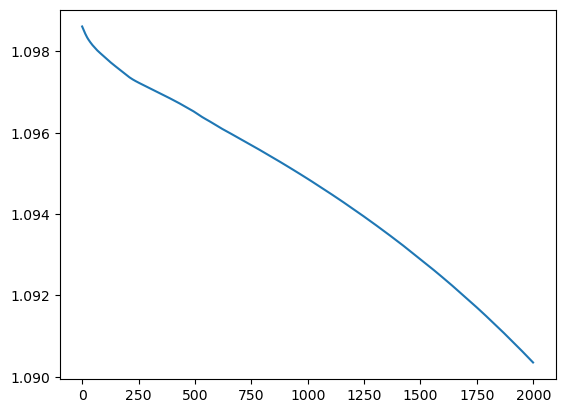

In [108]:
plt.plot(list_loss)

In [127]:
# ============================
# Training metrics
# ============================
with torch.no_grad():
    output_train = m1(X_train)   # forward
y_hat_train = output_train.numpy()
y_hat_train = [np.argmax(i) for i in y_hat_train]

print(f"Training Accuracy : {accuracy_score(y_train, y_hat_train):.4f}")
print(f"Training Precision: {precision_score(y_train, y_hat_train, average='macro'):.4f}")
print(f"Training Recall   : {recall_score(y_train, y_hat_train, average='macro'):.4f}")
print(f"Training F1-score : {f1_score(y_train, y_hat_train, average='macro'):.4f}")

# ============================
# Testing metrics
# ============================
with torch.no_grad():
    output_test = m1(X_test)   # forward
y_hat_test = output_test.numpy()
y_hat_test = [np.argmax(i) for i in y_hat_test]

print(f"Testing Accuracy : {accuracy_score(y_test, y_hat_test):.4f}")
print(f"Testing Precision: {precision_score(y_test, y_hat_test, average='macro'):.4f}")
print(f"Testing Recall   : {recall_score(y_test, y_hat_test, average='macro'):.4f}")
print(f"Testing F1-score : {f1_score(y_test, y_hat_test, average='macro'):.4f}")


Training Accuracy : 0.6884
Training Precision: 0.6884
Training Recall   : 0.6884
Training F1-score : 0.6883
Testing Accuracy : 0.6840
Testing Precision: 0.6841
Testing Recall   : 0.6840
Testing F1-score : 0.6838


In [ ]:
# Etiquetas de clase
class_labels = ['BA','ER','WS']

# ============================
# Matriz de confusión - Train
# ============================
cm_train = confusion_matrix(y_train, y_hat_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                                    display_labels=class_labels)
disp_train.plot(cmap="Blues", values_format="d")
plt.title("Train")
plt.savefig("mlp_train_confusion.png", dpi=300, bbox_inches="tight")
plt.close()

# ============================
# Matriz de confusión - Test
# ============================
cm_test = confusion_matrix(y_test, y_hat_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                                   display_labels=class_labels)
disp_test.plot(cmap="Oranges", values_format="d")
plt.title("Test")
plt.savefig("mlp_test_confusion.png", dpi=300, bbox_inches="tight")
plt.close()
